# Week 6 Data Challenge

### Background

I am a Yammer analyst trained to consider the value of each project. Value is measured as the maximum return on my time investment. 

### The problem

There is an unexpected downturn in Yammer's user engagement in the month of August, 2014. I have been tasked with identifying the cause of the drop in engagement and must recommend a time-efficient solution.

### Hypothetical Causes of Engagment Drop

1. **Technical error**. Was a server or database down? Was there a bad update in the production code? Was there A|B testing in progress that interfered with UX/UI?
    - To test this, I will look for a change in the type of user events with particular interest in homepage landings, email activity, logins, and likes. 
    - I will look for different patterns of use between user types (which remain undefined in the instructions) 
    - I will look for patterns of use by device type. For example, if there is a bug with a Windows update that prevented Windows users, but not MacOS users from logging in or otherwise engaging with the platform
    
    
2. **Social consequences**. Did the CEO post something inflammatory on Twitter? Was there popular unrest or pandemic? Was it a holiday?
    - I did a Google search for events related to Yammer to see if it was in the news, but found nothing significant 
    - Sept 2, 2014 was the day after labor day in the US but the drop happened prior to the holiday
    
    
3. **Business consequences** - Is this a part of a larger business cycle? Was there a corresponding drop in the stock market? Did a competitor increase competition with a new product or feature? Was there a change to user policy? 
    - **Yammer made the migration to Sharepoint with Yammer Enterprise as part of the MS Office enterprise suite. A user had to take extra steps to activate their yammer enterprise accounts.**
        - ". Before you can activate Yammer Enterprise, you need to choose Yammer tool for Sharepoint Online by going to Office 365 Admin Centre, Sharepoint -> Settings. On the settings page, change the Enterprise Social Collaboration tool to Yammer.com service."
        - There's an additional step and activation hurdle if you already have an office365 personal account.
        - If this is an impactful hurdle for Yammer usage, it will affect Yammer users who have to transition from personal accounts to enterprise accounts due to an activation step. There will be hurdles in the activation process with a large number of pending activations. All devices are likely to be affected proprtionate to their average uses, as are engagemnt frequency and types.
    - July 24, 2014 a co-founder, David Sacks announced his resignation, but it isn't likely that the typical user would know this or let it impact their yammer activity.
    - There were no large turns in the stockmarket.
    - I found no significant events in searches related to yammer's competitors having an advantage over yammer.
    - I found no mention of changes to user policy after Feb 2014, but this would be something to check for internally

### Results and Recommended Solutions

There is a hold-up in the account activation process likely due to the transition to Yammer enterprise. This is leading to uniform effects on user engagement regardless of engagement type or device type. The only potential correlation is user type, which is not defined in the initial writeup. I've made attempts at determining the criteria for user classification and have ruled out location, device type, language, date of creation, and date of activation. I would consult with my team for further informatio on user type. 

Interestingly, the number of re-engagement emails sent did not increase as a result of the sudden drop in engagement in August. This could mean the drop was not sever enough to trigger preventive action to retain user engagement or that the threshold for preventative action needs to be lowered for correction of future drops.

## Dependencies

#### Import packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import datetime as dt
from pandas_profiling import ProfileReport

#### Define default values

In [2]:
d_home = os.path.join('~',"Docs","insight","data_challenges")
d_data = os.path.join(d_home,'data')

## Read in the CSVs

I want to explore them each individually before joining them to cut down on processing time.

### Users Dataset

In [3]:
df = pd.read_csv(os.path.join(d_data, 'yammer_users.csv'))
dfu = df.copy()
dfu.user_id = dfu.user_id.astype(int)
dfu = dfu.set_index('user_id')
dfu.info()
display(HTML(dfu.head().to_html()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19066 entries, 0 to 19065
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   created_at    19066 non-null  object 
 1   company_id    19066 non-null  float64
 2   language      19066 non-null  object 
 3   activated_at  9381 non-null   object 
 4   state         19066 non-null  object 
dtypes: float64(1), object(4)
memory usage: 893.7+ KB


,created_at,company_id,language,activated_at,state
user_id,,,,,
0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active
1,2013-01-01 13:07:46,28.0,english,NaN,pending
2,2013-01-01 10:59:05,51.0,english,NaN,pending
3,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active
4,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active


### Remove duplicates

In [4]:
dfu = dfu.drop_duplicates()

### Get missing

In [5]:
print("Number of missing create dates: ", len(np.where(dfu.created_at.isnull())[0]))
print("Number of missing activate dates: ", len(np.where(dfu.activated_at.isnull())[0]))

Number of missing create dates:  0
Number of missing activate dates:  9685


### Convert the time to a timestamp column

In [6]:
dfu.created_at = pd.to_datetime(dfu.created_at, format = "%Y-%m-%d %H:%M:%S", errors = 'ignore')
dfu.activated_at = pd.to_datetime(dfu.activated_at, format = "%Y-%m-%d %H:%M:%S", errors = 'ignore')
dfu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19066 entries, 0 to 19065
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   created_at    19066 non-null  datetime64[ns]
 1   company_id    19066 non-null  float64       
 2   language      19066 non-null  object        
 3   activated_at  9381 non-null   datetime64[ns]
 4   state         19066 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 893.7+ KB


In [7]:
dfu.sort_values('created_at', ascending = False).head()

,created_at,company_id,language,activated_at,state
user_id,,,,,
19057,2014-08-31 20:40:32,7872.0,indian,NaT,pending
19055,2014-08-31 20:21:14,9073.0,french,2014-08-31 20:22:54,active
19059,2014-08-31 19:51:59,6817.0,indian,2014-08-31 19:53:43,active
19058,2014-08-31 19:48:45,12624.0,english,NaT,pending
19065,2014-08-31 19:29:19,8352.0,italian,NaT,pending


### Is there a problem with the signup process. 
#### Could a user activate their account after 7-25-14?

In [8]:
max(dfu.activated_at)

Timestamp('2014-08-31 20:22:54')

That rules out an inability to activate an account. 

#### Does it matter when the person created the account? 

In [9]:
dfu['time_to_activation'] =(dfu.activated_at-dfu.created_at).dt.seconds

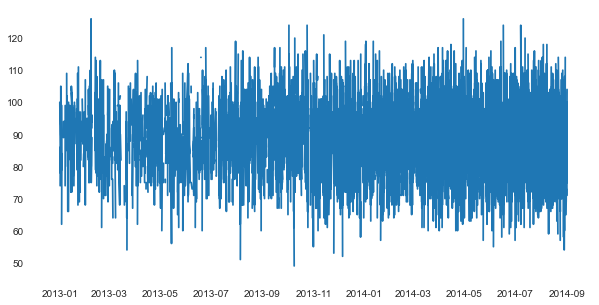

In [10]:
fig1, ax = plt.subplots(1,1, figsize = (10,5))
ax.plot(dfu.created_at, dfu.time_to_activation)
ax.spines['bottom'].set_visible(True)

This is not what I expected. The time between account creation and activation for non-null dates is between 50-100 seconds. 

1. Double check that my datetime conversions are correct. They are.
2. Double check that my timedelta units are correct. They are.
3. What is the difference between accounts activated and those pending?

(0.0, 2000.0)

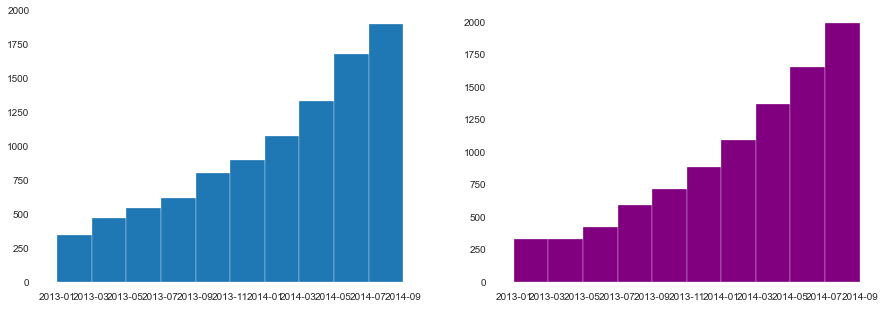

In [15]:
fig2, ax = plt.subplots(1,2, figsize = (15,5))
a3 = ax[0].hist(dfu[dfu.state == 'pending'].created_at)
a4 = ax[1].hist(dfu[dfu.state == 'active'].created_at, color = 'purple')
ax[0].set_ylim(0,2000)

What are the distributions of state?

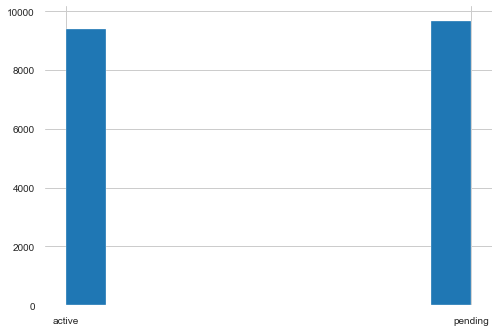

In [18]:
dfu.state.hist()

Over time, there is a history of a high percentage of pending rates, and the number of pending accounts outnumbers the number of active accounts.

So far, the only concrete problems I see are the extraordinarily fast activation times and that half of the dataset is in the pending state. Now, I want to know whether these pending activations are truly pending and I want to know if the activated accounts are actually active. 

### Import the events dataset

In [20]:
dfv = pd.read_csv('data/yammer_events.csv')
#dfv.info()
#dfv.head()

#### Set occurred_at as datetime and ID to int

In [21]:
dfv.occurred_at = pd.to_datetime(dfv.occurred_at, format = "%Y-%m-%d %H:%M:%S", 
                  errors = 'ignore')
dfv.user_id = dfv.user_id.astype(int)
dfv.info()
dfv.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340832 entries, 0 to 340831
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   user_id      340832 non-null  int64         
 1   occurred_at  340832 non-null  datetime64[ns]
 2   event_type   340832 non-null  object        
 3   event_name   340832 non-null  object        
 4   location     340832 non-null  object        
 5   device       340832 non-null  object        
 6   user_type    325255 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 18.2+ MB


,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


Find the range of time for evaluation period

In [22]:
year_range = dfv.occurred_at.max() - dfv.occurred_at.min()
year_range

Timedelta('122 days 22:09:30')

The range is less than a year, so I can use resample by weeks safely.

#### Did any of the pending users engage with the plaform?

In [23]:
engaged_users = np.unique(dfv.user_id)
pending_users = dfu[dfu.state =='pending'].index
unique_engaged = [u for u in dfu.index.values if u not in engaged_users]
unique_activated = [u for u in engaged_users if u not in dfu.index.values ]
unique_pending = [u for u in pending_users if u in engaged_users]

print('Number of activated accounts without engagement: ', len(unique_engaged))
print('Number of engaged accounts without activation: ', len(unique_activated))
print('Number of pending accounts with engagement: ', len(unique_pending))

Number of activated accounts without engagement:  9306
Number of engaged accounts without activation:  0
Number of pending accounts with engagement:  3618


Pending users did account for some activity.

#### Were pending actively engaging or were they caught in the signup flow?

In [25]:
pending_in_signup = [u for u in unique_pending if u in \
       dfv[dfv.event_type == 'signup_flow'].user_id.values]
pending_engaged = [u for u in unique_pending if u in \
       dfv[dfv.event_type == 'engagment'].user_id.values]
print('Pending users caught in signup_flow', len(pending_in_signup))
print('Pending users actively engaging on the platform: ', len(pending_engaged))

Pending users caught in signup_flow 3618
Pending users actively engaging on the platform:  0


Pending were caught in signup flow and were not engaging.

#### Is there a relationship between the time a user was activated and their engagement frequency?

In [26]:
# Find the most recent engagment for each user ID
dfg = dfv.groupby(['user_id','event_type']).max().reset_index()
dfg.head()

,user_id,event_type,occurred_at,event_name,location,device,user_type
0,4,engagement,2014-07-07 07:49:15,view_inbox,India,samsung galaxy s4,3.0
1,8,engagement,2014-07-30 06:10:09,view_inbox,France,macbook pro,3.0
2,11,engagement,2014-08-06 13:12:14,view_inbox,United States,iphone 4s,1.0
3,17,engagement,2014-08-12 11:04:37,view_inbox,Japan,macbook pro,1.0
4,19,engagement,2014-07-01 06:50:56,view_inbox,Nigeria,nexus 7,1.0


In [27]:
# Get engagement counts 
dfc = dfv.groupby(['user_id','event_type']).count().reset_index()
dfc.head()

,user_id,event_type,occurred_at,event_name,location,device,user_type
0,4,engagement,93,93,93,93,93
1,8,engagement,36,36,36,36,36
2,11,engagement,126,126,126,126,126
3,17,engagement,55,55,55,55,55
4,19,engagement,71,71,71,71,71


In [28]:
# Merge the user table and the events table on user_id
tmp = dfu.loc[dfg.user_id][:].reset_index()
dfg = dfg.merge(tmp, how = 'left', on = 'user_id')
dfg.head()

,user_id,event_type,occurred_at,event_name,location,device,user_type,created_at,company_id,language,activated_at,state,time_to_activation
0,4,engagement,2014-07-07 07:49:15,view_inbox,India,samsung galaxy s4,3.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,74.0
1,8,engagement,2014-07-30 06:10:09,view_inbox,France,macbook pro,3.0,2013-01-01 04:38:30,2698.0,french,2013-01-01 04:40:10,active,100.0
2,11,engagement,2014-08-06 13:12:14,view_inbox,United States,iphone 4s,1.0,2013-01-01 08:07:45,3745.0,english,2013-01-01 08:09:17,active,92.0
3,17,engagement,2014-08-12 11:04:37,view_inbox,Japan,macbook pro,1.0,2013-01-02 10:56:15,5025.0,japanese,2013-01-02 10:57:58,active,103.0
4,19,engagement,2014-07-01 06:50:56,view_inbox,Nigeria,nexus 7,1.0,2013-01-02 09:54:01,326.0,english,2013-01-02 09:55:34,active,93.0


In [30]:
# Make the new "activity_since_activation" column
dfg['time_since_activation'] = (dfg.occurred_at - dfg.activated_at).dt.days

dfg = dfg[dfg.event_type == 'engagement']
dfg.head()
display(HTML(dfg.head().to_html()))

,user_id,event_type,occurred_at,event_name,location,device,user_type,created_at,company_id,language,activated_at,state,time_to_activation,time_since_activation
0,4,engagement,2014-07-07 07:49:15,view_inbox,India,samsung galaxy s4,3.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active,74.0,551
1,8,engagement,2014-07-30 06:10:09,view_inbox,France,macbook pro,3.0,2013-01-01 04:38:30,2698.0,french,2013-01-01 04:40:10,active,100.0,575
2,11,engagement,2014-08-06 13:12:14,view_inbox,United States,iphone 4s,1.0,2013-01-01 08:07:45,3745.0,english,2013-01-01 08:09:17,active,92.0,582
3,17,engagement,2014-08-12 11:04:37,view_inbox,Japan,macbook pro,1.0,2013-01-02 10:56:15,5025.0,japanese,2013-01-02 10:57:58,active,103.0,587
4,19,engagement,2014-07-01 06:50:56,view_inbox,Nigeria,nexus 7,1.0,2013-01-02 09:54:01,326.0,english,2013-01-02 09:55:34,active,93.0,544


In [ ]:
# Plot time_from activation vs activation_at
#fig5, ax = plt.subplots(1,1, figsize =(15,5))
#ax.plot(dfg.activated_at, dfg.time_since_activation, ls = 'none', marker = 's')

#### Did the number of engagements per user change recently?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x139c3a950>]],
      dtype=object)

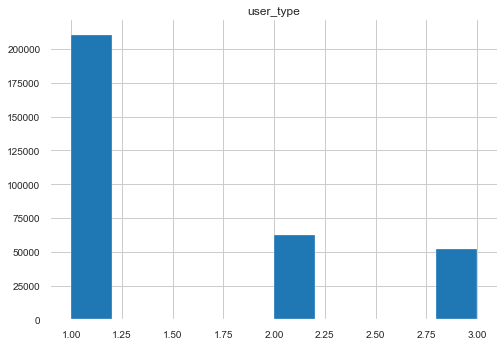

In [33]:
dfv.hist('user_type')
#print('User types: ', np.unique(dfv.user_type))  # has nan values
#print('Event types: ', np.unique(dfv.event_type)) 
#print('Event names: ', np.unique(dfv.event_name))
#print('Locations: ', np.unique(dfv.location))
#print('Devices: ', np.unique(dfv.device))

Nothing else is jumping out of me.

#### Get the number of engagement events per user

In [34]:
dft = dfv.groupby(['user_id', dfv['occurred_at'].dt.week]).count()
dft = dft.drop('occurred_at', axis = 1).reset_index()
dft.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,4,20,4,4,4,4,4
1,4,21,8,8,8,8,8
2,4,22,29,29,29,29,29
3,4,23,4,4,4,4,4
4,4,24,15,15,15,15,15


#### What is the total number of events for each week?

In [35]:
df_total = dft.groupby('occurred_at').count()
df_total = df_total.reset_index()
df_total.head()

,occurred_at,user_id,event_type,event_name,location,device,user_type
0,18,791,791,791,791,791,791
1,19,1244,1244,1244,1244,1244,1244
2,20,1270,1270,1270,1270,1270,1270
3,21,1341,1341,1341,1341,1341,1341
4,22,1293,1293,1293,1293,1293,1293


I also want to plot the mean and ssd because I'm not terribly impressed with the depth of the drop. I think it looks more dramatic because there's a small uptick around weeks 30-31, but this could also be confounded by the trend. I'll keep this mind for my modeling steps after my EDA. 

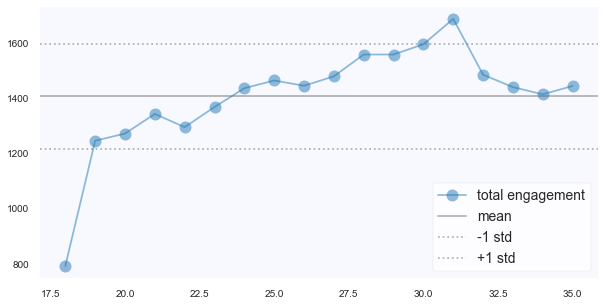

In [36]:
fig6, ax = plt.subplots(1,1, figsize = (10,5))
ax.plot(df_total.occurred_at, df_total.event_type, marker = 'o', ms = 12, 
        alpha = .5, label = 'total engagement')
avg = df_total.user_id.mean()
sd = df_total.user_id.std()
ax.axhline(avg, color = 'dimgray', ls = '-', alpha = 0.5, label = 'mean')
ax.axhline(avg - sd, color = 'dimgray', ls = ':', alpha = 0.5, label = '-1 std')
ax.axhline(avg + sd, color = 'dimgray', ls = ':', alpha = 0.5, label = '+1 std')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize = 14)
ax.set_facecolor ('ghostwhite')

#### What is the total number of events per event type?

In [37]:
df_en = dfv.groupby(['event_name', dfv['occurred_at'].dt.week]).count()
df_en = df_en.drop('occurred_at', axis = 1).reset_index()
df_en.head()

,event_name,occurred_at,user_id,event_type,location,device,user_type
0,complete_signup,18,81,81,81,81,81
1,complete_signup,19,160,160,160,160,160
2,complete_signup,20,186,186,186,186,186
3,complete_signup,21,177,177,177,177,177
4,complete_signup,22,186,186,186,186,186


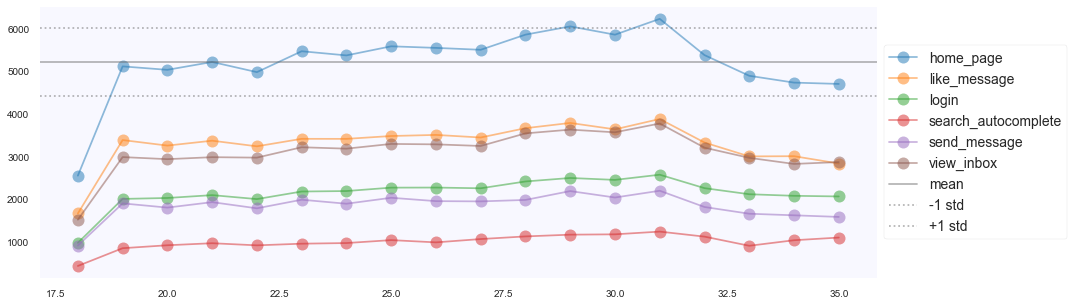

In [38]:
fig6, ax = plt.subplots(1,1, figsize = (15,5))
for e in np.unique(df_en.event_name):
    if max(df_en[df_en.event_name == e].event_type) >= 1000:
        ax.plot(df_en[df_en.event_name == e].occurred_at, 
            df_en[df_en.event_name == e].event_type, marker = 'o', ms = 12, 
            alpha = .5, label = e)
avg = df_en[df_en.event_name == 'home_page'].event_type.mean()
sd = df_en[df_en.event_name == 'home_page'].event_type.std()
ax.axhline(avg, color = 'dimgray', ls = '-', alpha = 0.5, label = 'mean')
ax.axhline(avg - sd, color = 'dimgray', ls = ':', alpha = 0.5, label = '-1 std')
ax.axhline(avg + sd, color = 'dimgray', ls = ':', alpha = 0.5, label = '+1 std')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc='center left', fontsize = 14, bbox_to_anchor=(1, 0.5))
ax.set_facecolor ('ghostwhite')

This also told me nothing. Homepage, liking messages, logins, search_autocomplete, send_message, and view_inbox all show the same decreased pattern.

#### Is the decrease in engagement region-specific?

In [39]:
df_loc = dfv.groupby(['location', dfv['occurred_at'].dt.week]).count()
df_loc = df_loc.drop('occurred_at', axis = 1).reset_index()
df_loc.head()

,location,occurred_at,user_id,event_type,event_name,device,user_type
0,Argentina,18,8,8,8,8,8
1,Argentina,19,47,47,47,47,46
2,Argentina,20,39,39,39,39,33
3,Argentina,21,74,74,74,74,67
4,Argentina,22,59,59,59,59,58


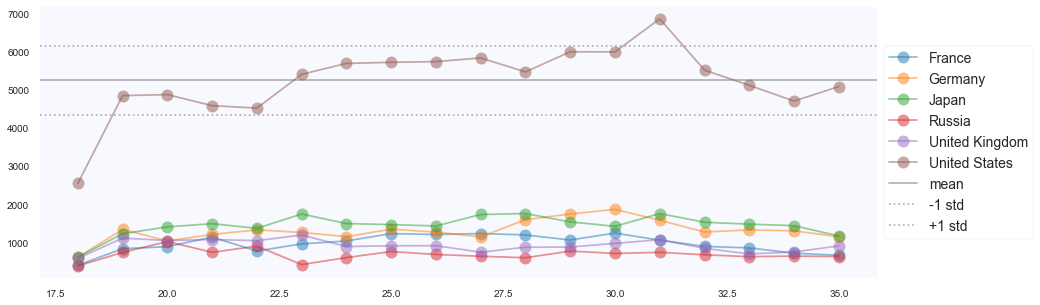

In [40]:
fig7, ax = plt.subplots(1,1, figsize = (15,5))
for l in np.unique(df_loc.location):
    if max(df_loc[df_loc.location == l].event_type) > 1000:
        ax.plot(df_loc[df_loc.location == l].occurred_at, 
            df_loc[df_loc.location == l].event_type, marker = 'o', ms = 12, 
            alpha = .5, label = l)
avg = df_loc[df_loc.location == 'United States'].event_type.mean()
sd = df_loc[df_loc.location == 'United States'].event_type.std()
ax.axhline(avg, color = 'dimgray', ls = '-', alpha = 0.5, label = 'mean')
ax.axhline(avg - sd, color = 'dimgray', ls = ':', alpha = 0.5, label = '-1 std')
ax.axhline(avg + sd, color = 'dimgray', ls = ':', alpha = 0.5, label = '+1 std')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc='center left', fontsize = 14, bbox_to_anchor=(1, 0.5))
ax.set_facecolor ('ghostwhite')


Ok so now we're getting somewhere. The US is more affected than other countries, though Germany shows something similar. 

#### Is device a factor?

In [41]:
df_device = dfv.groupby(['device', dfv['occurred_at'].dt.week]).count()
df_device = df_device.drop('occurred_at', axis = 1).reset_index()
df_device.head()

,device,occurred_at,user_id,event_type,event_name,location,user_type
0,acer aspire desktop,18,83,83,83,83,71
1,acer aspire desktop,19,319,319,319,319,300
2,acer aspire desktop,20,254,254,254,254,252
3,acer aspire desktop,21,236,236,236,236,228
4,acer aspire desktop,22,329,329,329,329,318


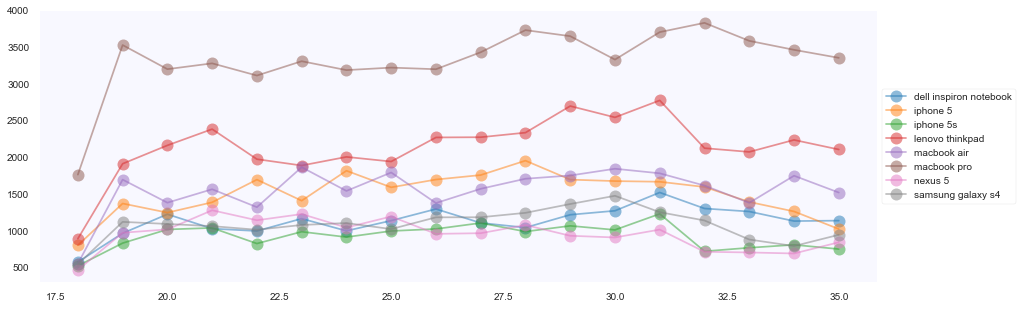

In [42]:
fig7, ax = plt.subplots(1,1, figsize = (15,5))
for l in np.unique(df_device.device):
    if max(df_device[df_device.device == l].event_type) > 1000:
        ax.plot(df_device[df_device.device == l].occurred_at, 
            df_device[df_device.device == l].event_type, marker = 'o', ms = 12, 
            alpha = .5, label = l)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_facecolor ('ghostwhite')

See it in Dell inspiron, iphone5, iphone5s, thinkpad,samsung galazy, nexxus. Not much in macbook pro or macbook Air. Still there, but reduced.

### Read in the user emails table

In [43]:
dfl = pd.read_csv('data/yammer_emails.csv')
dfl.info()
dfl.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90389 entries, 0 to 90388
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      90389 non-null  float64
 1   occurred_at  90389 non-null  object 
 2   action       90389 non-null  object 
 3   user_type    90389 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.8+ MB


,user_id,occurred_at,action,user_type
0,0.0,2014-05-06 09:30:00,sent_weekly_digest,1.0
1,0.0,2014-05-13 09:30:00,sent_weekly_digest,1.0
2,0.0,2014-05-20 09:30:00,sent_weekly_digest,1.0
3,0.0,2014-05-27 09:30:00,sent_weekly_digest,1.0
4,0.0,2014-06-03 09:30:00,sent_weekly_digest,1.0


Make occurred_at a datetime column

In [44]:
dfl.occurred_at = pd.to_datetime(dfl.occurred_at, 
                  format = "%Y-%m-%d %H:%M:%S", errors = 'ignore')
dfl.user_id = dfl.user_id.astype(int)
dfl.head()

,user_id,occurred_at,action,user_type
0,0,2014-05-06 09:30:00,sent_weekly_digest,1.0
1,0,2014-05-13 09:30:00,sent_weekly_digest,1.0
2,0,2014-05-20 09:30:00,sent_weekly_digest,1.0
3,0,2014-05-27 09:30:00,sent_weekly_digest,1.0
4,0,2014-06-03 09:30:00,sent_weekly_digest,1.0


#### What is the sigificance of user type?

#### Is there a particular action associated with the engagement slump?

In [45]:
df_action = dfl.groupby(['action', dfv['occurred_at'].dt.week]).count()
df_action = df_action.drop('occurred_at', axis = 1).reset_index()
df_action.head()

,action,occurred_at,user_id,user_type
0,email_clickthrough,18,297,297
1,email_clickthrough,19,520,520
2,email_clickthrough,20,483,483
3,email_clickthrough,21,567,567
4,email_clickthrough,22,503,503


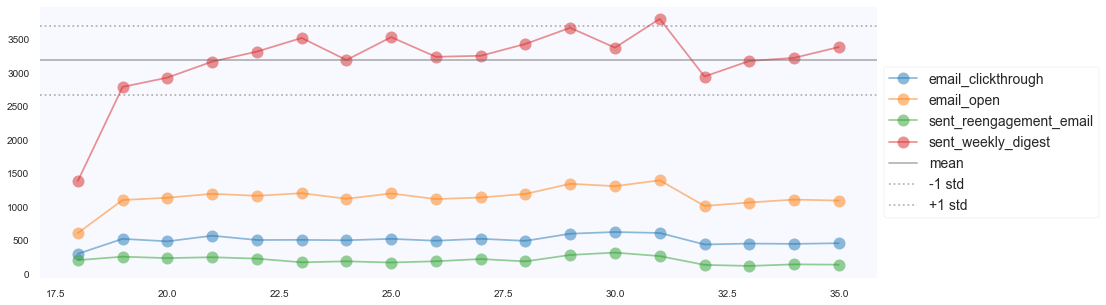

In [46]:
fig8, ax = plt.subplots(1,1, figsize = (15,5))
for l in np.unique(df_action.action):
    #if max(df_action[df_action.action == l].user_id) > 1000:
    ax.plot(df_action[df_action.action == l].occurred_at, 
            df_action[df_action.action == l].user_id, marker = 'o', ms = 12, 
            alpha = .5, label = l)
    
avg = df_action[df_action.action == 'sent_weekly_digest'].user_id.mean()
sd = df_action[df_action.action == 'sent_weekly_digest'].user_id.std()
ax.axhline(avg, color = 'dimgray', ls = '-', alpha = 0.5, label = 'mean')
ax.axhline(avg - sd, color = 'dimgray', ls = ':', alpha = 0.5, label = '-1 std')
ax.axhline(avg + sd, color = 'dimgray', ls = ':', alpha = 0.5, label = '+1 std')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc='center left', fontsize = 14, bbox_to_anchor=(1, 0.5))
ax.set_facecolor ('ghostwhite')

A few things that are of note:
- There is a decline in the number of weekly digests sent
- There is a decline in the number of emails opened
- There is a decline in the email clickthrough
- There is a decline in the sent reingagement email

If this was a significant decrease, and at least for week 30, I would expect there to be some sort of alarm bell that would trigger a re-engagement email to be sent out, but I'm not seeing that. There's also still baseline activity, so none of these values are going to 0, though the reengagement emails are close.

#### Is there a user type associated with the engagement slump?

In [47]:
df_type = dfl.groupby(['user_type', dfv['occurred_at'].dt.week]).count()
df_type = df_type.drop('occurred_at', axis = 1).reset_index()
df_type.head()

,user_type,occurred_at,user_id,action
0,1.0,18,1014,1014
1,1.0,19,2037,2037
2,1.0,20,1834,1834
3,1.0,21,2066,2066
4,1.0,22,1709,1709


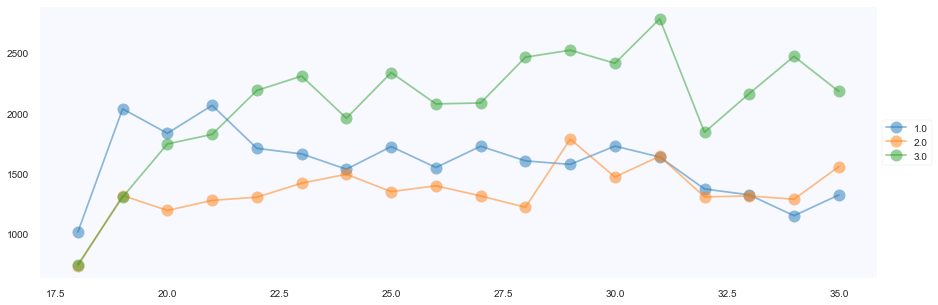

In [48]:
fig9, ax = plt.subplots(1,1, figsize = (15,5))
for l in np.unique(df_type.user_type):
    #if max(df_action[df_action.action == l].user_id) > 1000:
    ax.plot(df_type[df_type.user_type == l].occurred_at, 
            df_type[df_type.user_type == l].user_id, marker = 'o', ms = 12, 
            alpha = .5, label = l)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_facecolor ('ghostwhite')

User type 3 follows the pattern of overall engagement lapse, but not types 1 and 2. I need to go back and see what the correlation is between user type these other variables.

#### I need to further investigate what separates user types because there's a pronounced difference between their engagement between weeks 30 and 32 compared to the other user types.

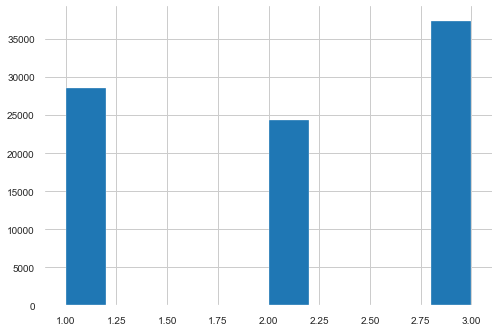

In [49]:
dfl.user_type.hist()

#### Does user type have to do with their in-service activities?

In [50]:
dfut = dfl.groupby(['user_type', 'action']).count()
dfut = dfut.reset_index()
dfut.user_type = dfut.user_type.astype(int)
dfut.head()

,user_type,action,user_id,occurred_at
0,1,email_clickthrough,2758,2758
1,1,email_open,6511,6511
2,1,sent_reengagement_email,892,892
3,1,sent_weekly_digest,18412,18412
4,2,email_clickthrough,2521,2521


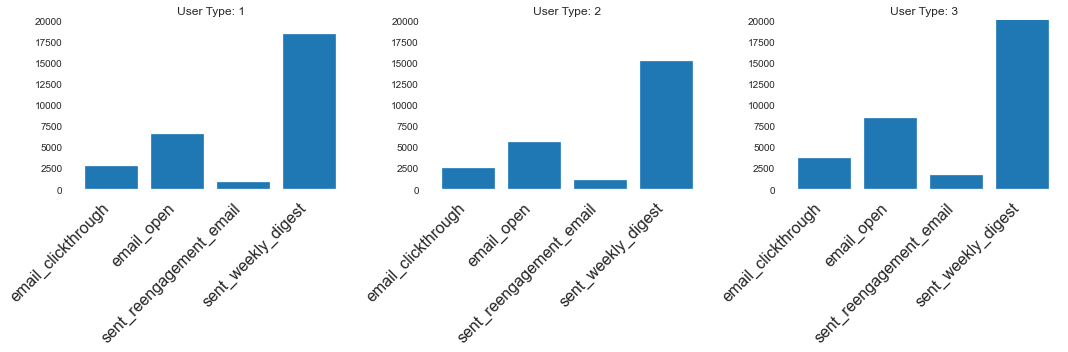

In [51]:
fig10, ax = plt.subplots(1,3, figsize = (15,5))
for i, t in enumerate(np.unique(dfut.user_type)):
    ax[i].bar(x = dfut[dfut.user_type == t].action, 
           height = dfut[dfut.user_type == t].user_id)
    ax[i].set_xticklabels(dfut[dfut.user_type == t].action, 
           rotation = 45, fontsize = 16, ha = 'right')
    ax[i].set_ylim(0,20000)
    ax[i].set_title('User Type: ' + str(t))
plt.tight_layout()

No, user type is not descriptive of in-service activity. 

Other avenues I could try are location, but even from the header, I can see that is not the case. Device type was not very informative, so user_type is not likely to reflect device type. Because Yammer highly values time, this is something I would note, but pursue at a later date with more info from the rest of my team.

## Modeling plan

In signal processing, I always look for a stable baseline against which I measure events (anomalies). The ideal baseline is stationary with a variance as close to 0 as possible with no oscillations (periodicity). 

For the total engagement, engagement by users in the US, and many of the other time series, the data is non-stationary. There is a drift (trend) toward increased engagement over time. This trend needs to be removed to determine whether the drop is worth the time investment, 1 standard deviation from the mean (minimal) or 2 standard deviations (worthwhile).

1. De-trend the total engagement time series
2. Calculate the mean and SSD
4. Predict whether the "dip" is an anomaly or not

## Make Test and Training Sets

### Detrend the total engagement dataset

In [ ]:
def subtract_baseline(df, col):
    df['subtracted']= np.nan
    i = 0
    for index,row in df.iterrows():
        if i > 0:
            df.at[index,'subtracted'] = row[col] - last_row
        last_row = row[col]
        i += 1
    return df

In [ ]:
df_total = subtract_baseline(df_total, 'event_type')
fig11, ax = plt.subplots(1,1, figsize = (10,5))
ax.plot(df_total.occurred_at, df_total.subtracted, marker = 'o', ms = 12,
        alpha = .5, label = 'detrended engagement')
avg = df_total.subtracted.mean()
sd = df_total.subtracted.std()
ax.axhline(avg, color = 'dimgray', ls = '-', alpha = 0.5, label = 'mean')
ax.axhline(avg - sd, color = 'dimgray', ls = ':', alpha = 0.5, label = '-1 std')
ax.axhline(avg + sd, color = 'dimgray', ls = ':', alpha = 0.5, label = '+1 std')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize = 14)
ax.set_facecolor ('ghostwhite')

### Look for autocorrelation
#### Original data

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_total.event_type, lags=5)

In [ ]:
plot_pacf(df_total.event_type, lags=5)

All but one value is within the 95% confidence interval, so there's no autocorrelation (or hidden periodicity).

### Look for relationships between variables - Dynamic Time Warping
#### Total engagement and user type

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = df_total.subtracted.fillna(0).interpolate().values
d2 = df_type[df_type.user_type == 1].subtracted.fillna(0).interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Total Engagement')
plt.ylabel('User Type 1 Engagement')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.colorbar()

In [ ]:
d1 = df_total.subtracted.fillna(0).interpolate().values
d2 = df_type[df_type.user_type == 2].subtracted.fillna(0).interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Total Engagement')
plt.ylabel('User Type 2 Engagement')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.colorbar()

In [ ]:
d1 = df_total.subtracted.fillna(0).interpolate().values
d2 = df_type[df_type.user_type == 3].subtracted.fillna(0).interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Total Engagement')
plt.ylabel('User Type 3 Engagement')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.colorbar()

In [ ]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

x = d1
y = d2
distance, path = fastdtw(x, y, dist=euclidean)

print(distance)
print(path)

### De-trend with a linear model

In [ ]:
from sklearn.linear_model import LinearRegression

# fit linear model
X = [i for i in range(0, len(df_total.occurred_at))]
X = np.reshape(X, (len(X), 1))
y = df_total.event_type.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
plt.plot(y)
plt.plot(trend)
plt.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(df_total.occurred_at))]
# plot detrended
plt.plot(detrended)
plt.show()

#### Random sampling method

In [ ]:
from sklearn.model_selection import ShuffleSplit
train_cols = [c for c in num_cols if 'Class' not in c]
split = ShuffleSplit(n_splits = 10, test_size = 0.25, random_state = 17)
for train_index, test_index in split.split(df[train_cols], df.Class):
    shuff_train = df.iloc[train_index][:]
    shuff_test = df.iloc[test_index][:]

In [ ]:
shuff_train.head()

#### Decide on final test and training sets
Stratifying the sets made no difference in the overall distribution of the training/test datasets or in the error compared to the original set, so I'll go with the randomly shuffled dataset.

In [ ]:
y_train = shuff_train.Class
X_train = shuff_train.drop('Class', axis = 1)
y_test = shuff_test.Class
X_test = shuff_test.drop('Class', axis = 1)

## Run ARIMA

#### Check shapes of X_test and X_train

In [ ]:
print(X_train.shape, X_test.shape)

#### Define the model

#### Fit the model

#### Make predictions

## Validate the results

#### Get accuracy score

#### Get Metrics

#### Get confusion matrix

#### Plot confusion matrix

## Summary

#### Key findings

#### Interpretation

#### Actionable Insights